Analysis from Lightcurves

In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
%matplotlib inline

lc_23sep = fits.open('/content/ch2_xsm_20210923_v1_level2.lc')
lc_23sep.info()

lc_24sep = fits.open('/content/ch2_xsm_20210924_v1_level2.lc')
lc_23sep.info()

lc_28sep = fits.open('/content/ch2_xsm_20210927_v1_level2.lc')
lc_23sep.info()

lc_27sep = fits.open('/content/ch2_xsm_20210928_v1_level2.lc')
lc_23sep.info()

lc_29sep = fits.open('/content/ch2_xsm_20210929_v1_level2.lc')
lc_23sep.info()

Filename: /content/ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   
Filename: /content/ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   
Filename: /content/ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   
Filename: /content/ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   
Filename: /content/ch2_xsm_20210923_v1_level2.lc
No.    Name    

In [2]:
header1_23sep = lc_23sep[0].header
header1_23sep

header2_23sep = lc_23sep[1].header
header2_23sep

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

The 2nd header file contains count rate, and hence is the more important file.

In [3]:
data_23sep = lc_23sep[1].data
data_23sep, data_23sep.shape

(FITS_rec([(1.49126401e+08, 494.83276, 22.244837, 1.),
           (1.49126402e+08, 518.2688 , 22.765518, 1.),
           (1.49126403e+08, 504.4697 , 22.460403, 1.), ...,
           (1.49212797e+08, 376.00684, 19.390896, 1.),
           (1.49212798e+08, 374.12167, 19.342226, 1.),
           (1.49212799e+08, 401.34076, 20.033491, 1.)],
          dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')])),
 (84280,))

In [4]:
data_23sep['RATE']

array([494.83276, 518.2688 , 504.4697 , ..., 376.00684, 374.12167,
       401.34076], dtype='>f4')

In [5]:
lc = [lc_23sep, lc_24sep, lc_27sep, lc_28sep, lc_29sep];
headers = [l[1].header for l in lc];
data = [l[1].data for l in lc]

Data is stored as a numpy record with 84280 entries, and each entry contains 4 fields:

Time

Count Rate

Error in count rate

FracExp

# ***To Visually Identify flares***

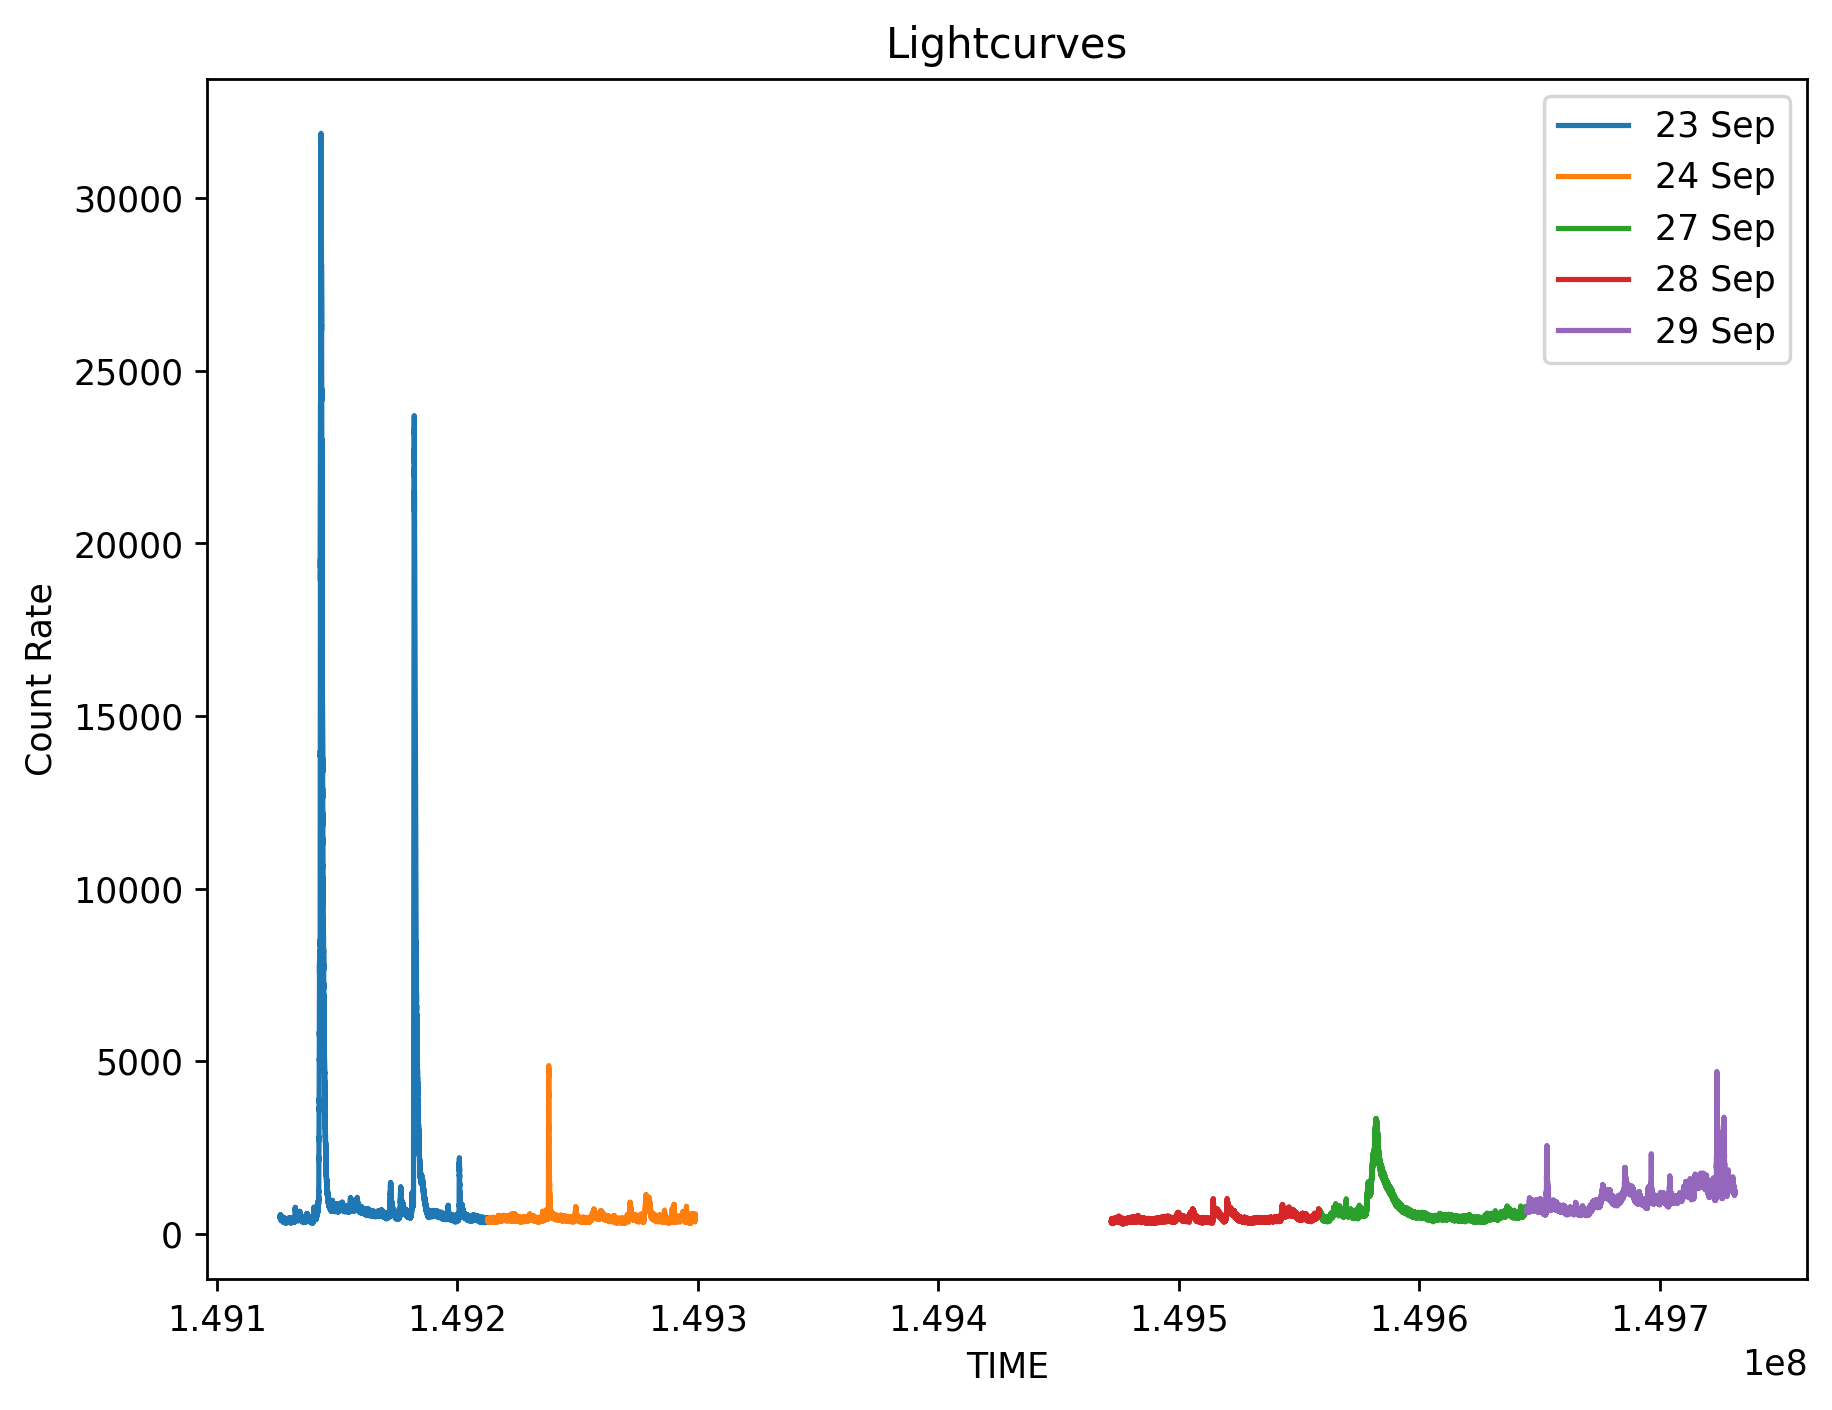

In [6]:
fig = plt.figure(dpi=250)
dates = ['23 Sep', '24 Sep', '27 Sep', '28 Sep', '29 Sep']
ax = fig.add_axes([0, 0, 1, 1])
for i in range(5):
    ax.plot(data[i]['TIME'], data[i]['RATE'])
    ax.set_title('Lightcurves')
    ax.set_xlabel('TIME')
    ax.set_ylabel('Count Rate')
ax.legend(dates);

there is gap in the time axis as measurements were not taken on 25th and 26th September and that data is missing.

We have to identify the flares in the lightcurve visually, and that can be done using the interactive image in jupyter notebook, made possible by the %matplotlib notebook command.

Visually, we have inferred the following to be the start and corresponding end times of flares from the given lightcurves. we have used the zoom function in the interactive image in jupyter notebook to get these values.

In [7]:
start = np.array([1.4914128e08, 1.4917621e08, 149200497, 149237824, 149577815, 149652482, 149685302, 149696331, 149723348])
stop = np.array([1.4914759e08, 1.4918800e08, 149201799, 149239296, 149598094, 149654437, 149688092, 149697148, 149727993])

Wherever in the graph we saw inordinate increase in the count rate of the lightcurves, we zoomed in and recorded the start and end points of the increase. At some places there were small increases in the count rate quite close to a flare, and we have not considered them to be flares, as they could be small ejections before the actual flare.

# ***To Calculate Means, Peaks, Slopes***
we choose 4 flares to find these characteristics for, each from a different day


[451.37042 451.73776 472.67258 ... 715.203   767.7732  760.9876 ]
[451.37042 451.73776 472.67258 ... 715.203   767.7732  760.9876 ]
[545.15155 493.35254 469.11633 ... 463.52243 565.6295  538.42664]
[545.15155 493.35254 469.11633 ... 463.52243 565.6295  538.42664]
[]
[]


<ipython-input-9-0b5a17ceb0c3>:31: RuntimeWarning: Mean of empty slice.
  means.append(flare_rates.mean())


ValueError: zero-size array to reduction operation maximum which has no identity

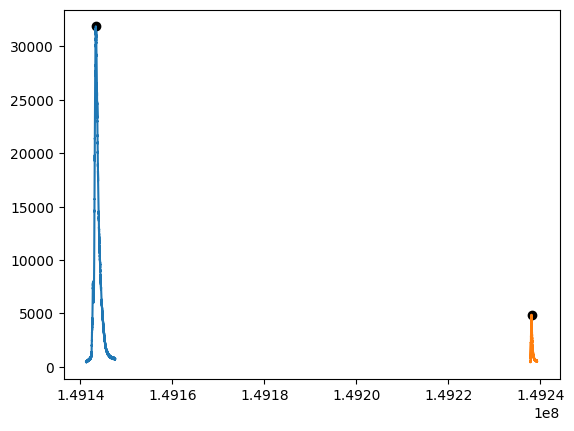

In [9]:
means = []
peaks = []
rise_slopes = []
fall_slopes = []


# will choose 4 flares to find these characteristics for, each from a different day
chosen_flares = [1, 4, 5, 9]

#the start and end times of these chosen flares
flare_start = [start[i-1] for i in chosen_flares]
flare_end = [stop[i-1] for i in chosen_flares]

# which day it is
i = 0
for start_time, stop_time in zip(flare_start, flare_end):
    if (i==2):
        # no flare on the day 27th September
        i=3
    #Filtering the times such that they lie in the flare occurence period
    bool_arr = (data[i]['TIME'] >= start_time) & (data[i]['TIME'] <= stop_time)
    flare_time = data[i]['TIME'][bool_arr]
    flare_rates = (data[i]['RATE'][bool_arr])

    # Plotting the flares only, just for verification
    plt.plot(flare_time,flare_rates)

    print(flare_rates)

    # Calculating mean, peak, slopes
    means.append(flare_rates.mean())
    print(flare_rates)
    peak_val = flare_rates.max()
    peaks.append(peak_val)
    max_time = flare_time[flare_rates == peak_val]
    rise_slopes.append((peak_val - flare_rates[0])/(max_time - start_time)[0])
    fall_slopes.append((peak_val - flare_rates[-1])/(stop_time - max_time)[0])

    # Verifying the peaks
    plt.scatter(max_time, peak_val, c='black')
    # Moving to the next day
    i+=1

In [10]:
print(f'The means in the given flares are ')
print(means)
print(f'The peaks in the given flares are ')
print(peaks)
print(f'The average slopes of rise in the given flares are ')
print(rise_slopes)
print(f'The average slopes of fall in the given flares are ')
print(fall_slopes)

The means in the given flares are 
[6097.838, 1463.0272, nan]
The peaks in the given flares are 
[31883.889, 4872.3403]
The average slopes of rise in the given flares are 
[14.9343439206224, 16.30366098401912]
The average slopes of fall in the given flares are 
[7.400899210488301, 3.5918755596871654]


In [11]:
complete_time = data[0]['TIME']
complete_rate = data[0]['RATE']
for i in range(1, 5):
    complete_time = np.concatenate((complete_time, data[i]['TIME']))
    complete_rate = np.concatenate((complete_rate, data[i]['RATE']))
flares = ((complete_time > start[0]) & (complete_time < stop[0]))
for start_time, stop_time in zip(start, stop):
    flares = flares | ((complete_time > start_time) & (complete_time < stop_time))

background_times = complete_time[np.logical_not(flares)]
background_rates = complete_rate[np.logical_not(flares)]

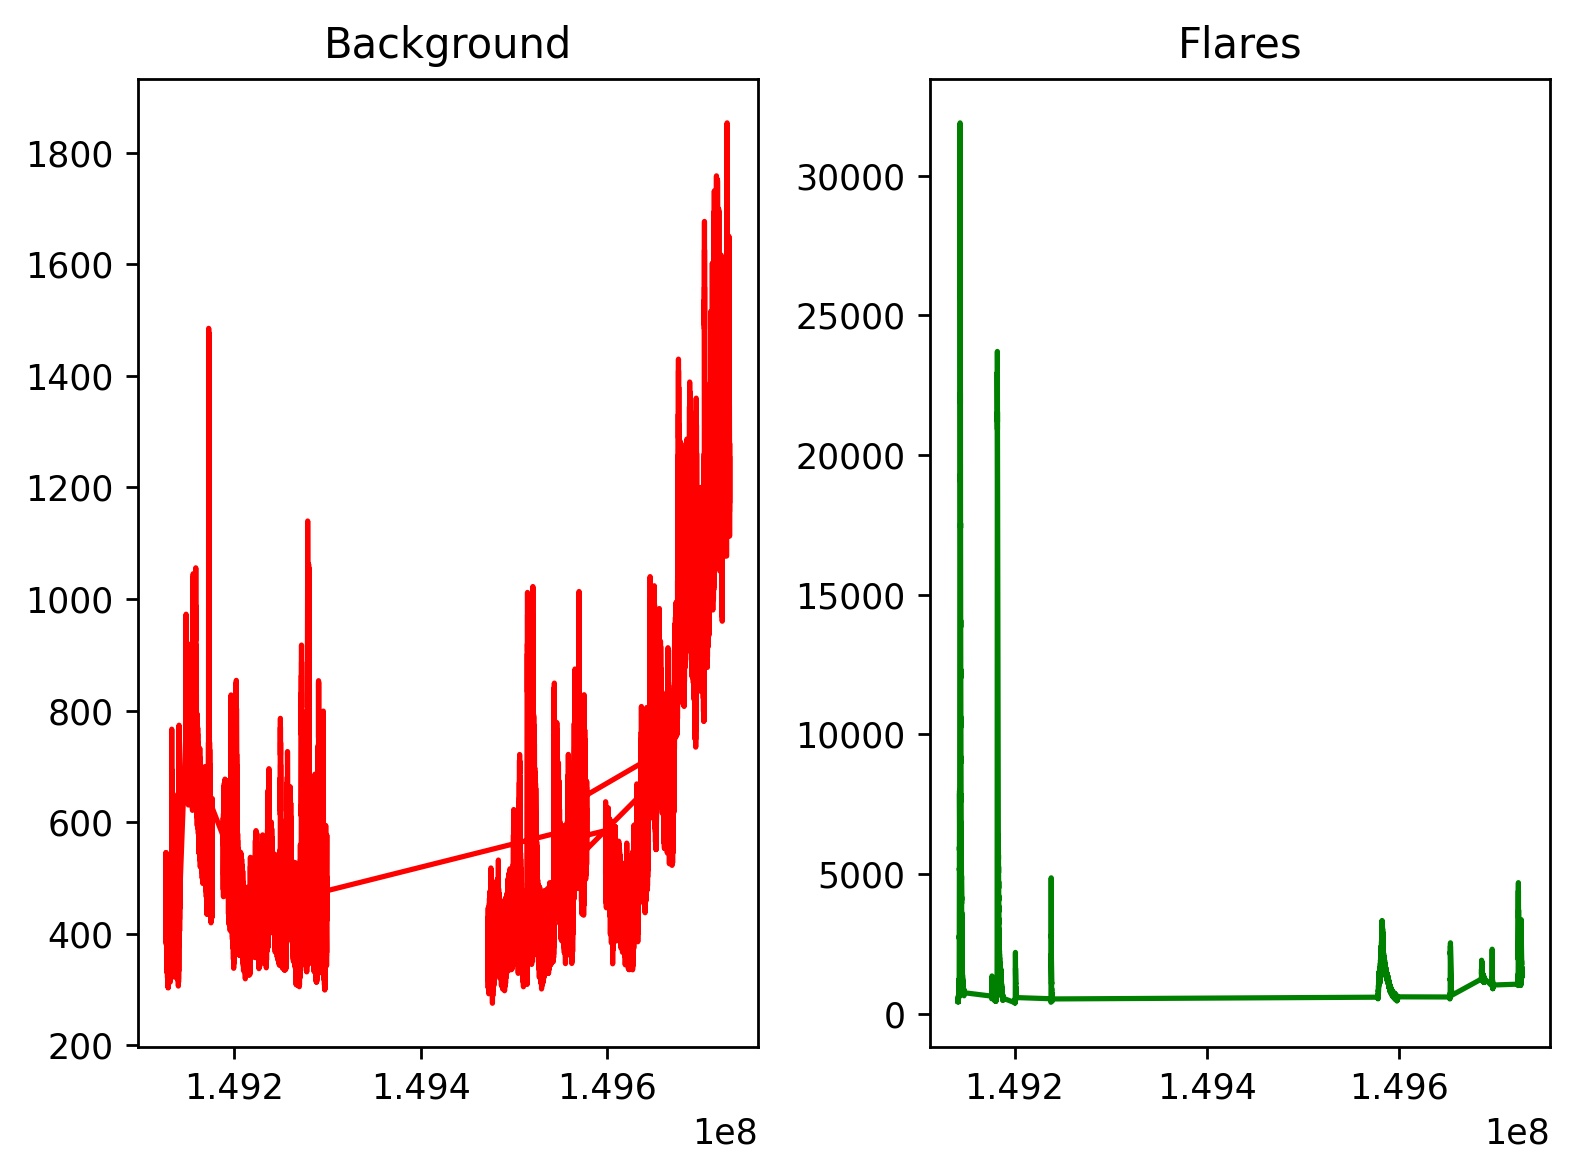

In [12]:
#Verifying our background lightcurve points
Curve, axes = plt.subplots(1, 2, dpi=250)

axes[0].plot(background_times, background_rates, 'r');
axes[0].set_title('Background')
axes[1].plot(complete_time[flares], complete_rate[flares], 'g')
axes[1].set_title('Flares')
Curve.tight_layout()

In [13]:
mean_background_rate = background_rates.mean()
flare_mean_rate = complete_rate[flares].mean()
print(f'The mean background rate is {mean_background_rate}')
print(f'In Contrast, the mean flare rate is {flare_mean_rate}')

The mean background rate is 590.7056274414062
In Contrast, the mean flare rate is 2066.176025390625


***N-Sigma***

1) Smoothing the Lightcurve

In [14]:
from astropy.convolution import convolve, Box1DKernel

intervals = [(data[i]['TIME'][-1] - data[i]['TIME'][0])/50 for i in range(5)]
intervals

[1727.96, 1724.94, 1727.98, 1727.96, 1727.96]

In [15]:
intervals = [(data[i]['TIME'][-1] - data[i]['TIME'][0]) for i in range(5)]
def smooth_lightcurves(interval):
    return [convolve(data[i]['RATE'], Box1DKernel(intervals[i]/interval)) for i in range(5)]

In [16]:
smooth_lightcurves_80 = smooth_lightcurves(80)
smooth_lightcurves_40 = smooth_lightcurves(40)

      0
0  TIME
1  RATE
      0
0  TIME
1  RATE
      0
0  TIME
1  RATE
      0
0  TIME
1  RATE
      0
0  TIME
1  RATE


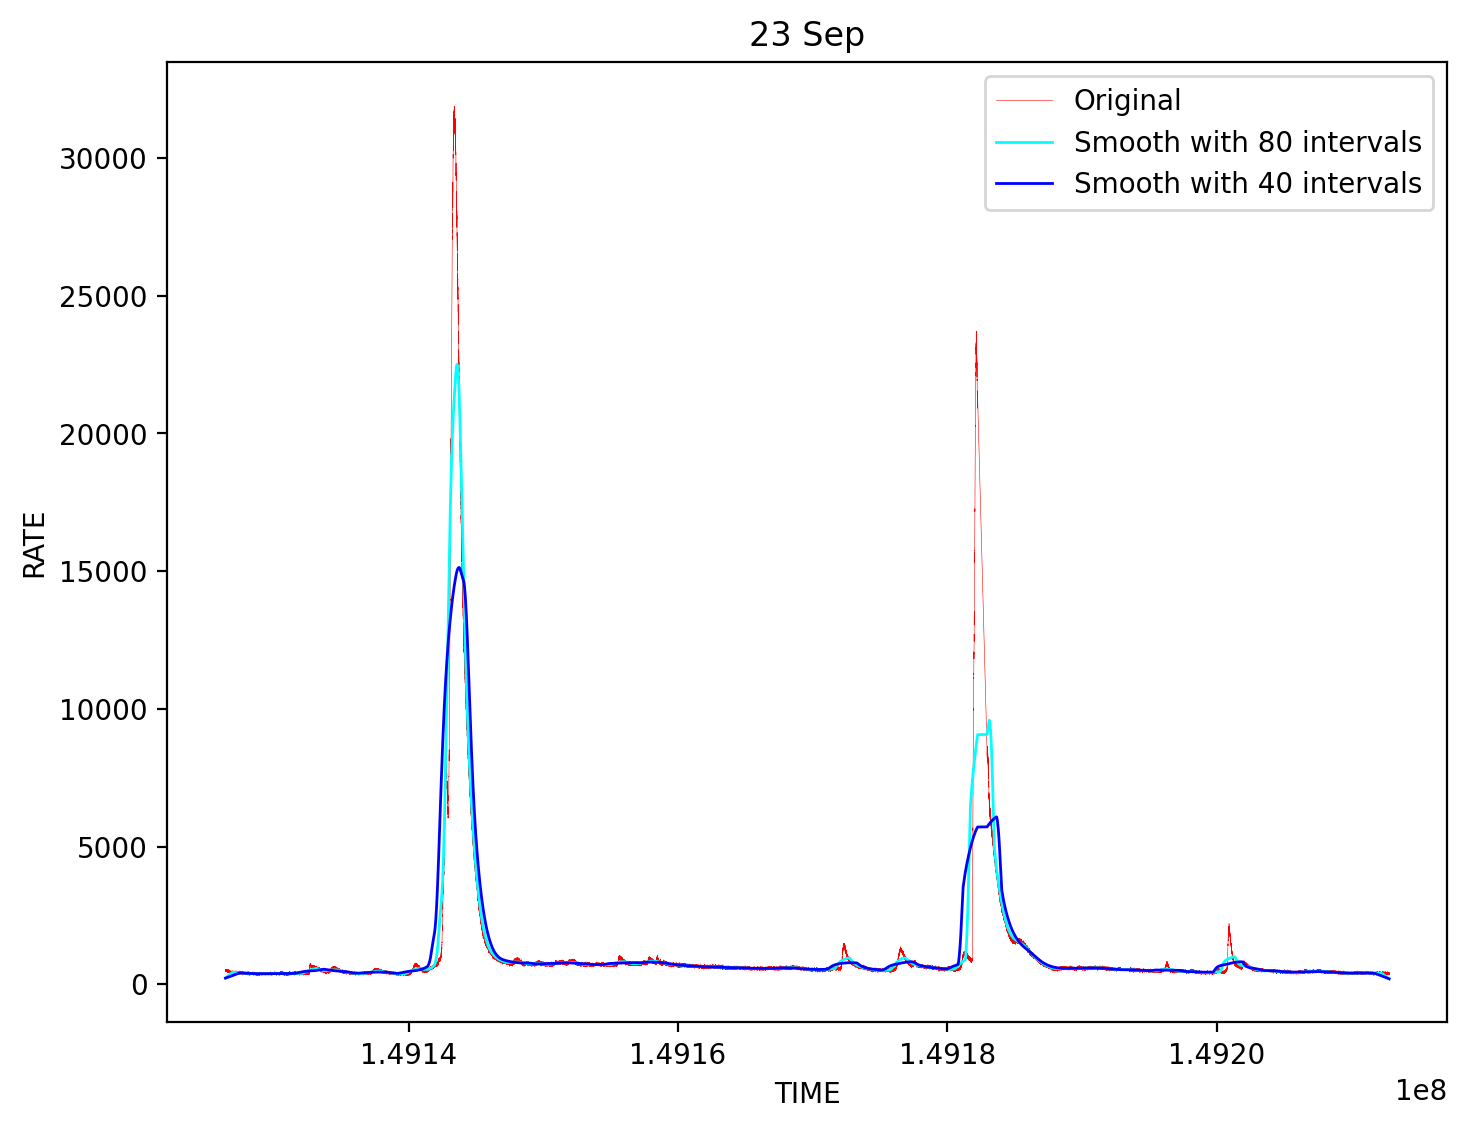

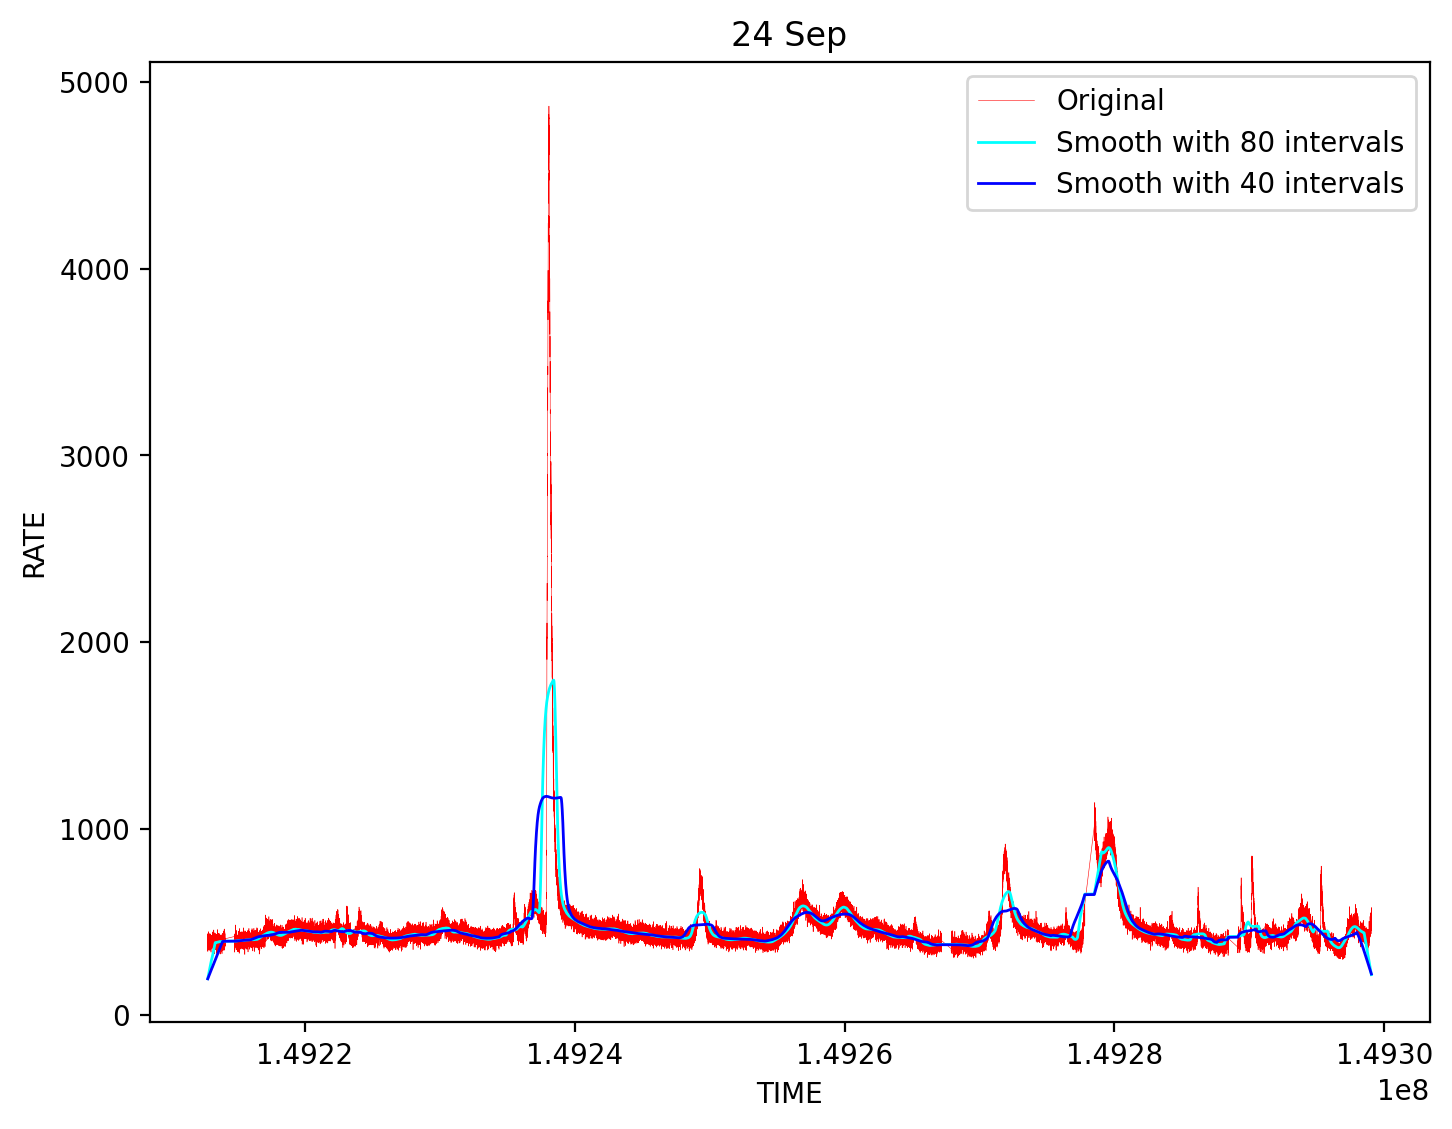

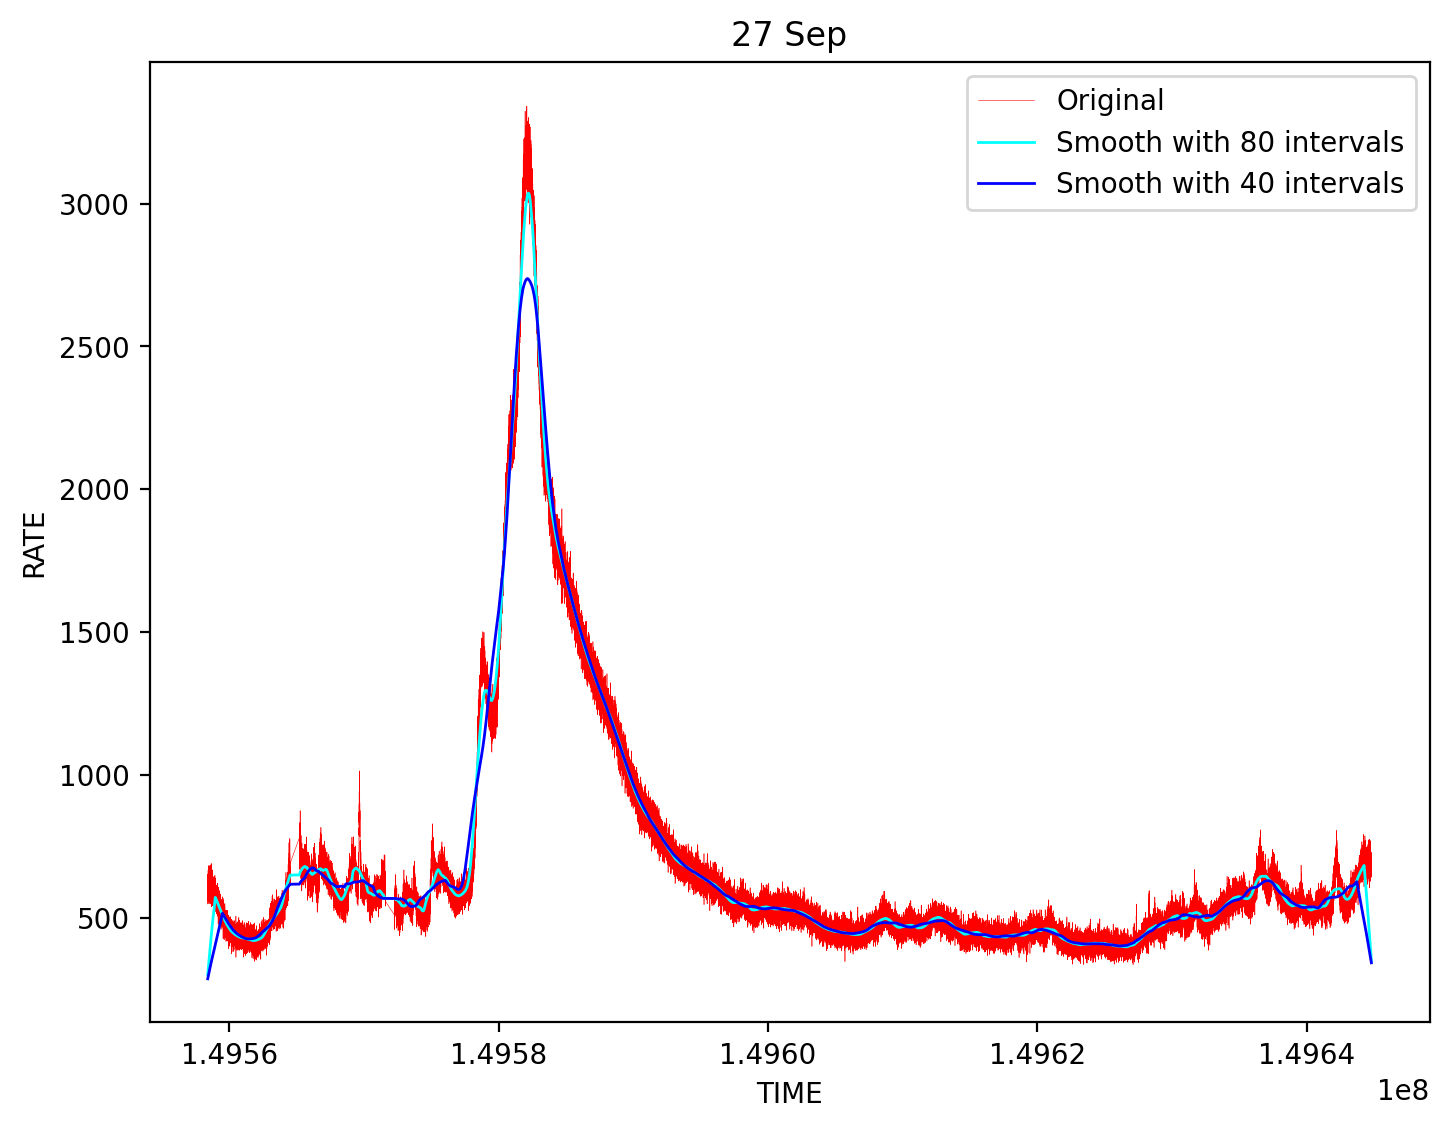

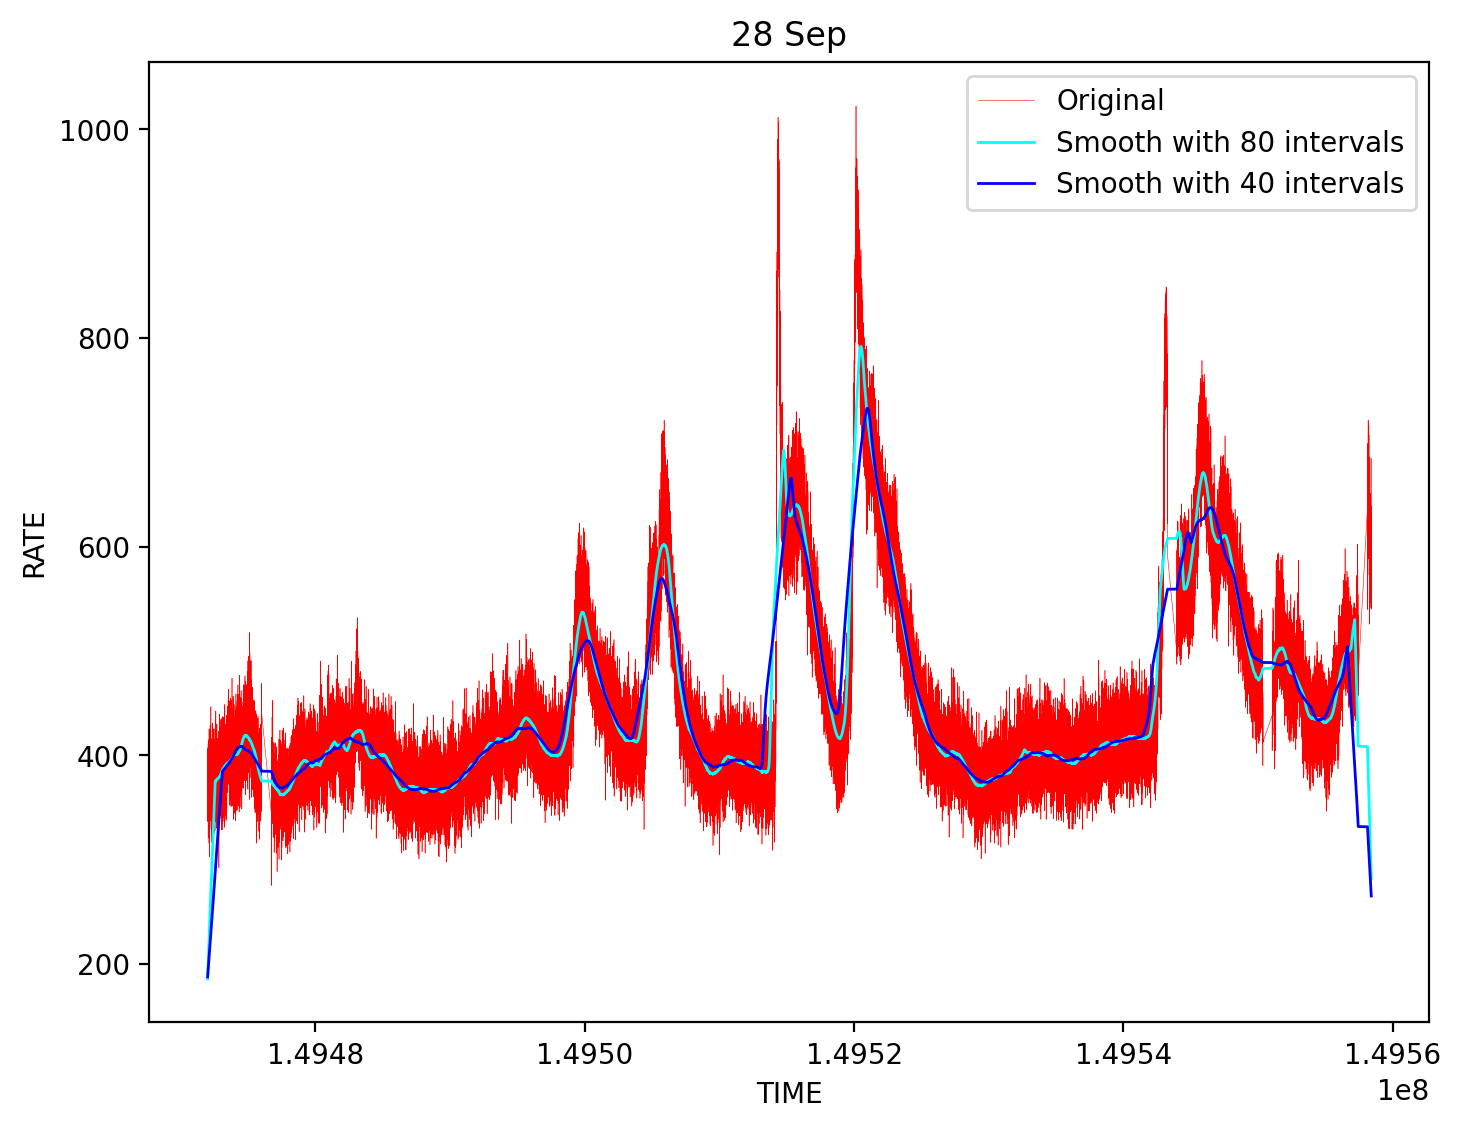

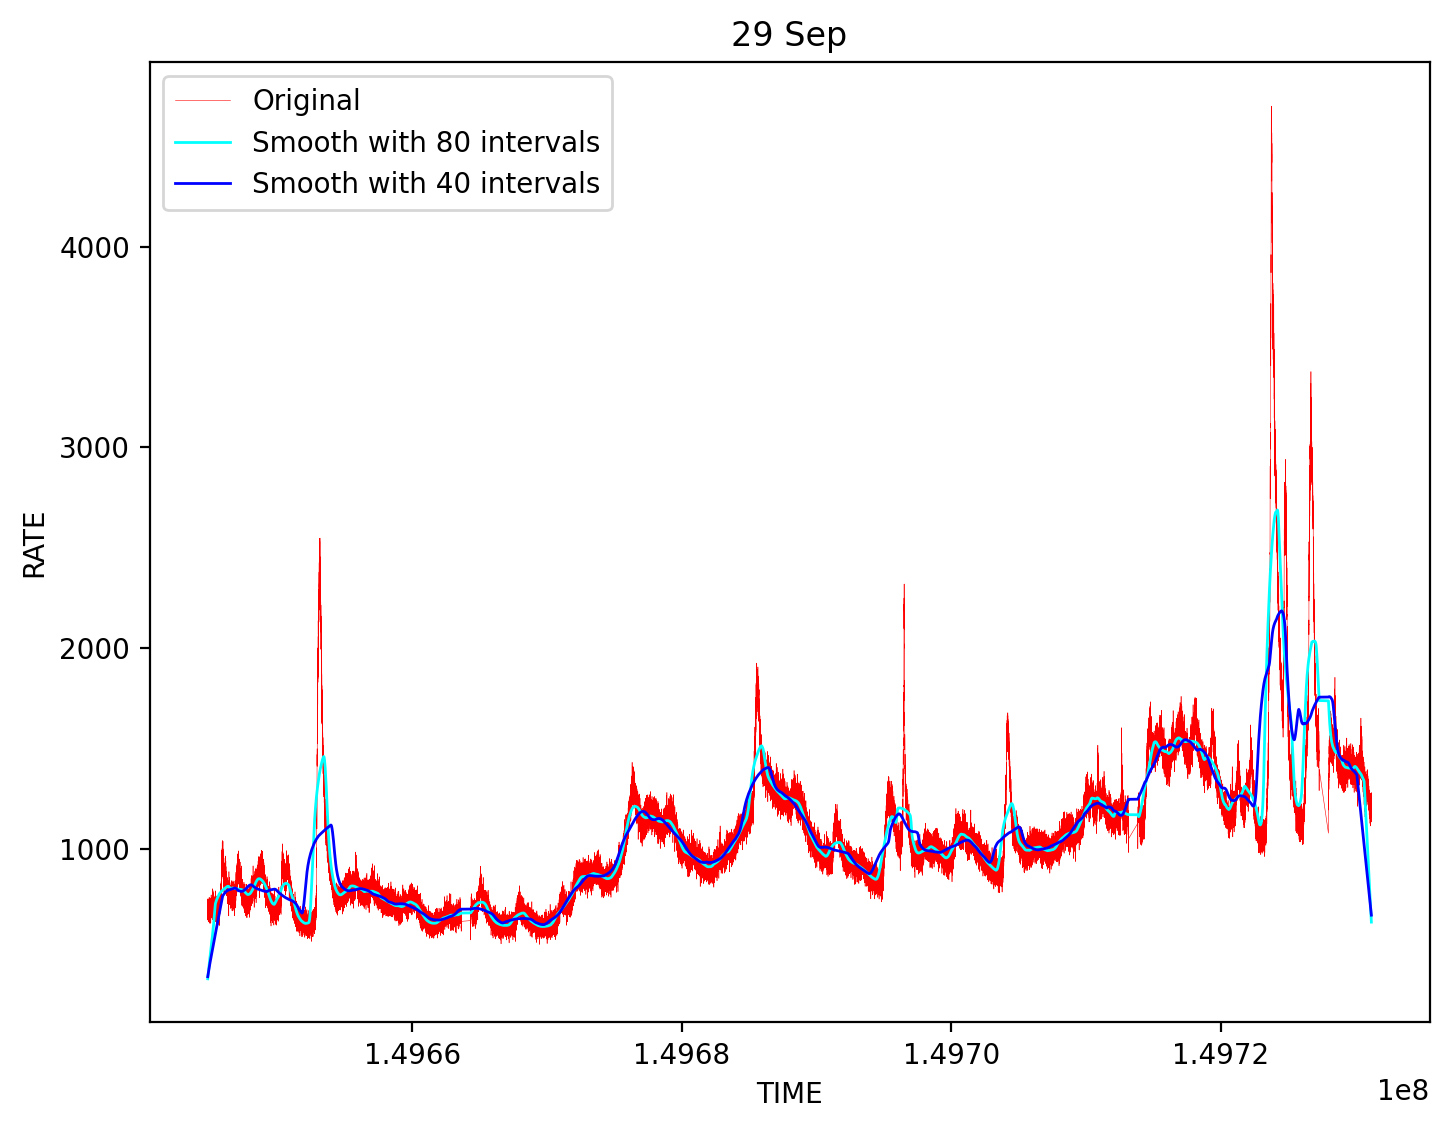

In [17]:
for i in range(5):
    fig = plt.figure(dpi=200)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(data[i]['TIME'], data[i]['RATE'], 'r', linewidth=0.2)
    ax.plot(data[i]['TIME'], smooth_lightcurves_80[i], 'aqua', linewidth=1)
    ax.plot(data[i]['TIME'], smooth_lightcurves_40[i], 'b', linewidth=1)
    ax.set_title(dates[i])
    ax.set_xlabel('TIME')
    ax.set_ylabel('RATE')
    ax.legend(['Original', 'Smooth with 80 intervals', 'Smooth with 40 intervals'])
    signal_plot=(['TIME','RATE'])
    dataset= pd.DataFrame(signal_plot)
    print(dataset)
    dataset.to_excel("sigdata.xlsx")

2) Binning

In [18]:
def rebin(bin_count, time, count):
    time_vals = np.array(np.array_split(np.sort(time), bin_count), dtype=object)
    count_vals = np.array(np.array_split(count, bin_count), dtype=object)
    time_vals = np.round(np.array([np.sum(i) for i in time_vals]), 0)
    count_vals = np.round(np.array([np.sum(i) for i in count_vals]), 0)
    return np.sort(time_vals), count_vals

a = np.array(np.array_split(np.arange(10), 3), dtype=object)

def myadd(arr):
    return np.sum(arr)
mysum = np.vectorize(myadd)
a, mysum(a)

(array([array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])],
       dtype=object),
 array([ 6, 15, 24]))

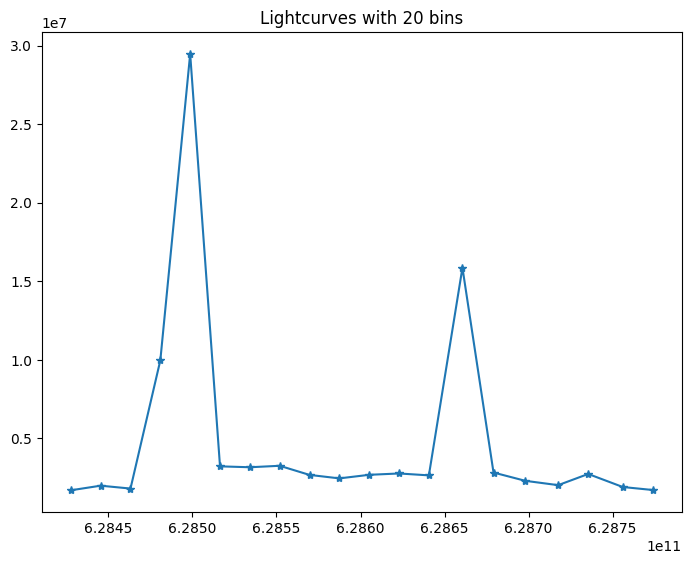

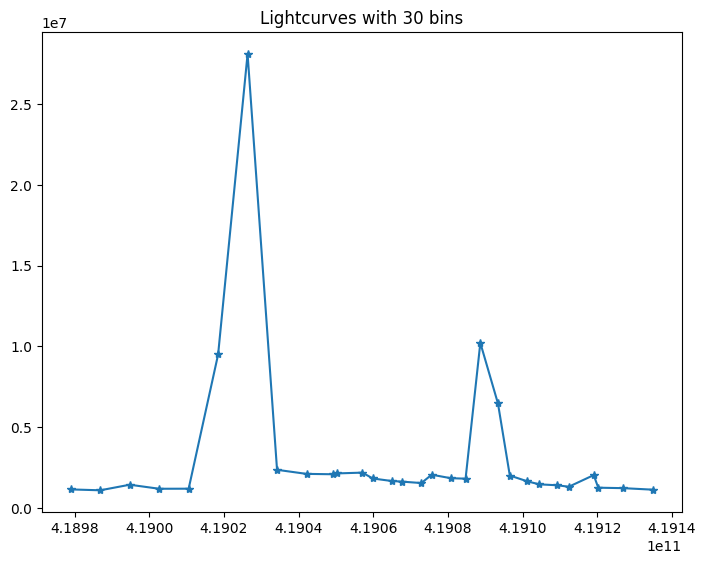

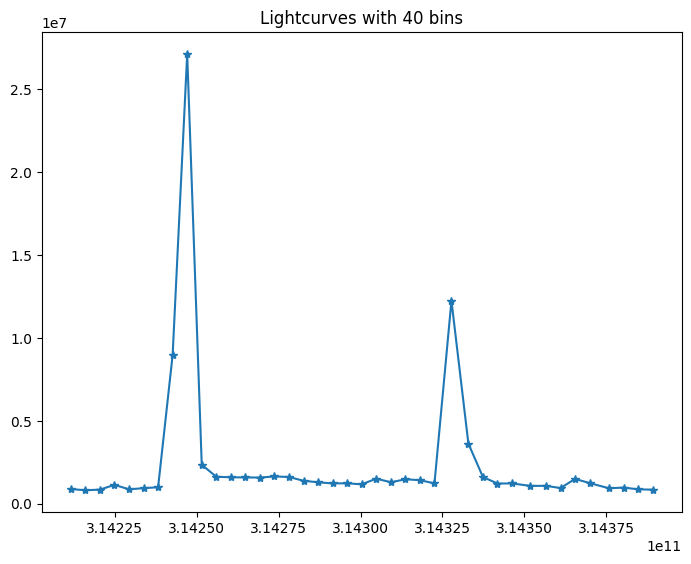

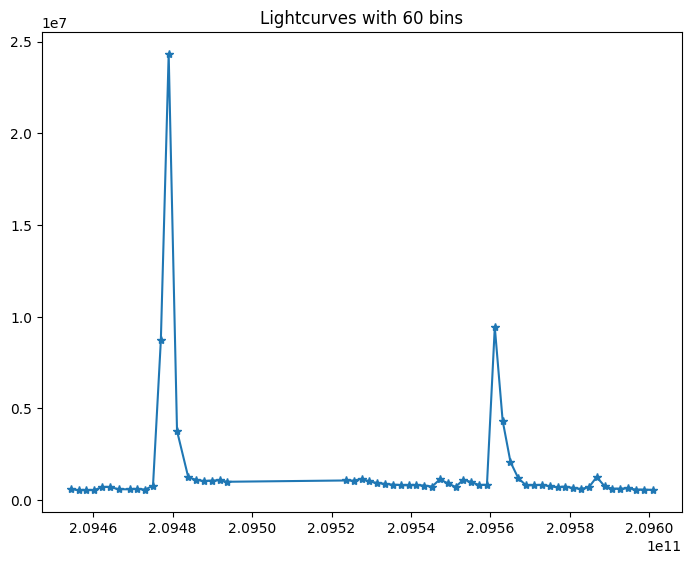

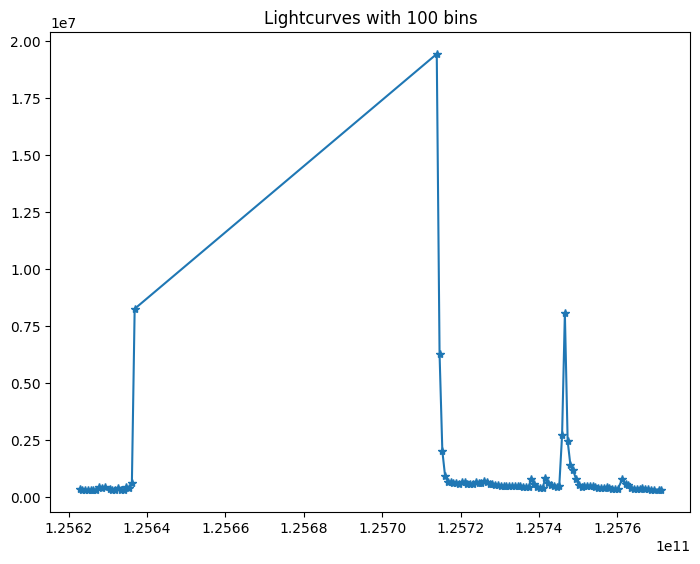

In [19]:
bins = [20, 30, 40, 60, 100]
for bin in bins:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    time, count = rebin(bin, data[0]['TIME'], data[0]['RATE'])
    ax.plot(time, count, '*-')
    ax.set_title('Lightcurves with ' + str(bin) + ' bins')

 XSM gives count rates with a spacing of 1
second. While this is good for finding transients like gamma ray bursts, it is not particularly
helpful for flares as they tend to have a longer duration.
To resolve this, we implemented a method to rebin the histogram with a different
timestep. Experimenting on different time bins from a range of ~20 to ~200. Picking a few
values (say 5) in this range and ploting the lightcurve
